Prototyping the wiggle plot.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib import pyplot as plt

os.chdir('/home/bruno/datacloud')

plt.style.use('seaborn-dark')

plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (7.5, 5)

In [2]:
offsets_range = 200

In [3]:
wavelets = [
    np.cos(10041*np.arange(100)) + np.sin(284*(np.arange(100)+51)),
    np.cos(1000*np.arange(100)) + np.sin(6000*np.arange(100)),
    np.cos(253*np.arange(100))+68 + np.sin(9945*np.arange(100))-511,
           ]

In [4]:
import numpy as np
import matplotlib.pyplot as plt
    
def wiggle_plot(wavelets, offsets, time_range, gain=20, color='k', ax=None):

    if not ax:
        fig, ax = plt.subplots()

    y = time_range

    for offset, wavelet in zip(offsets,wavelets):
        x = ((wavelet) / wavelet.std()) * gain + offset
        ax.plot(x, y ,'-', color=color)
        ax.fill_betweenx(y, offset, x, where=(x>=offset), color=color, interpolate=True)
        
    return fig, ax

In [5]:
from theory.core import Pipe, Rock, TheoreticalWavelet, MultipleWavelets

In [6]:
from scipy import signal

In [7]:
from dask import delayed, compute

In [8]:
%%time
rho_range = np.arange(100, 3200+100, 100)
alpha_range = np.arange(100, 3200+100, 100)
window = 500

pipe = Pipe(Rb=0.16, alpha=4875, rho=7200)
wavelets = []

for a in alpha_range:
    rock = delayed(Rock)(a, 3000)
    theoretical = delayed(TheoreticalWavelet)(pipe, rock)
    wavelets.append(delayed(theoretical.multiple_in_time_domain)(window, filtered=False))
wavelets = compute(wavelets)

CPU times: user 1.53 s, sys: 2.39 s, total: 3.92 s
Wall time: 596 ms


In [55]:
theoretical.multiple_in_time_domain(window, filtered=True)

Delayed('multiple_in_time_domain-a14dd98a-ed37-4f6e-b121-5eae057eddb3')

In [45]:
%load_ext line_profiler

In [59]:
%%time
rho_range = np.arange(100, 3200+100, 100)
alpha_range = np.arange(100, 3200+100, 100)
window = 500

pipe = Pipe(Rb=0.16, alpha=4875, rho=7200)
wavelets = []

for i, a in enumerate(alpha_range):
    rock = Rock(a, 3000)
    theoretical = TheoreticalWavelet(pipe, rock)
    wavelets.append(theoretical.multiple_in_time_domain(window, filtered=False))

CPU times: user 1.19 s, sys: 1.76 s, total: 2.95 s
Wall time: 409 ms


In [134]:
m = theoretical.multiple_in_time_domain(None, filtered=False)
%time rm = signal.filtfilt(theoretical.fir_taps, 1, m)

CPU times: user 146 ms, sys: 194 ms, total: 341 ms
Wall time: 44.3 ms


In [127]:
m.shape

(20000,)

In [126]:
m2.shape

(3500,)

In [136]:
theoretical.f

(1001,)

In [142]:
m = theoretical.multiple_in_time_domain(None, filtered=False)
m2 = theoretical.get_window_from_center(3500, m)
%time rm2 = signal.filtfilt(theoretical.fir_taps, 1, m2)

CPU times: user 111 ms, sys: 139 ms, total: 250 ms
Wall time: 32 ms


(-25, 25)

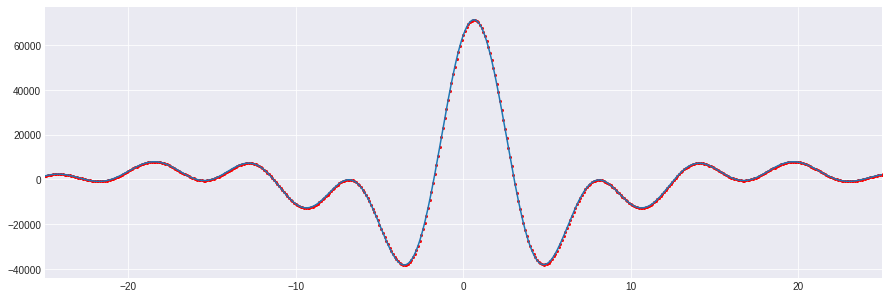

In [121]:
plt.plot(theoretical.get_time_range_for_window(theoretical.sampling_rate*2), rm)
plt.scatter(theoretical.get_time_range_for_window(3500), rm2, s=4, c='r')
plt.xlim(-25,25)

In [149]:
from dcrhino3.signal_processing.filters import FIRLSFilter, ssig

In [148]:
%lprun -f FIRLSFilter.make TheoreticalWavelet(pipe=pipe, rock=rock)

Timer unit: 1e-06 s

Total time: 0.033614 s
File: /home/bruno/Documents/Work/DataCloud/repos/dcrhino_lib/dcrhino3/signal_processing/filters.py
Function: make at line 73

Line #      Hits         Time  Per Hit   % Time  Line Contents
    73                                               def make(self, sampling_rate):#data_key):
    74                                                   """
    75                                                   Calculates nyquist frequency, creates corner_tuple, calls :func:`n_taps`,
    76                                                   and loads desired_response_amplitude. Calculates the values of the filter
    77                                                   coefficients using `scipy.signal.firls function. <https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firls.html>`_
    78                                                   Returns these coefficients (type: float32) 
    79                                                   
   

In [8]:
len(wavelets)

32

In [9]:
from dask import delayed

In [10]:
plt.rcParams['figure.figsize'] = (15, 5)

In [22]:
%%time
fig, ax = wiggle_plot(wavelets, alpha_range, theoretical.get_time_range_for_window(window), gain=30)
ax.invert_yaxis()
uri = mplfig_to_uri(fig)

CPU times: user 204 ms, sys: 109 ms, total: 313 ms
Wall time: 174 ms


In [19]:
from rhino_theory.theory.app.utils import mplfig_to_uri

In [20]:
%%time


CPU times: user 157 ms, sys: 138 ms, total: 295 ms
Wall time: 111 ms


In [13]:
MultipleWavelets(rho_range, alpha_range, pipe=pipe)